# 0.0 IMPORTS

In [205]:
import math
import inflection
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from IPython.display import Image
from uszipcode import SearchEngine
from IPython.core.display import HTML

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)

   ## 0.1 Helper Functions

# 0.2 Loading Data

In [206]:
df_raw = pd.read_csv('dataset/kc_house_data.csv')

# 1.0 DATA DESCRIPTION

In [207]:
# Estarei criando uma cópia de segurança caso aconteça alguma coisa com meu dataframe

df1 = df_raw.copy()

#describing columns
# date             Data em que a casa foi vendida
# price            Preço da casa quando ela foi vendida
# bedrooms         Número de quartos na casa
# bathrooms        Número de banheiros na casa onde 0.5 é toilet sem chuveiro
# sqft_living      Pés quadrados da área habitável da casa
# sqft_lot         Pés quadrados da área total do terreno
# floors           Número de andares na casa
# waterfront       Se a casa tem visa pro mar/rio
# view             Um índice de quão boa é a vista do imóvel
# condition        Condição do apartamento
# grade            Qualidade no quesito de contrução e desing, onde 1 é o pior e 13 o melhor
# sqft_above       A metragem quadrada do espaço de habitação interior que está acima do nível do solo
# sqft_basement    A metragem quadrada do espaço habitacional interior que fica abaixo do nível do solo
# yr_built         Ano de de construção do imóvel
# yr_renovated     Ano de reforma do imóvel
# zipcode          Código postal do imóvel
# lat              Latitude
# long             Longitude
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


## 1.1 Rename columns

#### Como as colunas já estavam do formato que eu gosto de usar, não renomeei nada

## 1.2 Data Dimension

In [208]:
print("Number of columns: {}".format(df1.shape[1]))
print('Number of Rols: {}'.format(df1.shape[0]))

Number of columns: 21
Number of Rols: 21613


## 1.3 Data type

In [209]:
# Escluindo as colunas sqft_living15 e sqft_lot15
df1 = df1.drop(['sqft_living15','sqft_lot15', 'id'], axis=1)
df1.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
dtype: object

## 1.4 Limpeza dos dados

In [210]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
dtypes: flo

## 1.5 Check NA

In [211]:
df1.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

## 1.6 Mudando os tipo de dados

* Haviam neste Dataset datas com 0, ou seja, não tinhamos valores nulos, porém valores errados. Quando convertido do tipo object para datetime, as datas que estavam com 0, ficaram com a data mínima 01-01-1970  


* Optei por não alterar os tipos das colunas yr_built e yr_renovated, pois elas fazem mais sentido para este caso se permanecerem como int

In [212]:
#Transformando o tipo para date
df1['date'] = pd.to_datetime(df1['date'], dayfirst=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

## 1.7 Estatística descritiva

### 1.7.1 Atributos Numéricos

In [213]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])

In [214]:
# Tendência central

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis

d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min )).T
d3 = pd.DataFrame(num_attributes.apply(max )).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew() )).T #A assimetria se refere a uma distorção ou assimetria que se 
                                                               #desvia da distribuição normal, em um conjunto de dados.
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis() )).T

# Concatenando todas medidas de disperção numerica
numerical_metrics = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
numerical_metrics.columns = ['attributes', 'min_value', 'max_value', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

numerical_metrics

,attributes,min_value,max_value,range,mean,median,std,skew,kurtosis
0,price,75000.00,7700000.00,7625000.00,540088.14,450000.00,367118.70,4.02,34.59
1,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.97,49.06
2,bathrooms,0.00,8.00,8.00,2.11,2.25,0.77,0.51,1.28
3,sqft_living,290.00,13540.00,13250.00,2079.90,1910.00,918.42,1.47,5.24
4,sqft_lot,520.00,1651359.00,1650839.00,15106.97,7618.00,41419.55,13.06,285.08
5,floors,1.00,3.50,2.50,1.49,1.50,0.54,0.62,-0.48
6,waterfront,0.00,1.00,1.00,0.01,0.00,0.09,11.39,127.63
7,view,0.00,4.00,4.00,0.23,0.00,0.77,3.40,10.89
8,condition,1.00,5.00,4.00,3.41,3.00,0.65,1.03,0.53
9,grade,1.00,13.00,12.00,7.66,7.00,1.18,0.77,1.19


**Observações após a análise descritiva**

* As casas tem uma média de preço de $ 540.000
* Com uma kurtosis bem alta na linha dos preços a possibilidade de haver outliers é bastante alta
* Temos poucas casas com vista para o mar
* Aparentemente a vista das casas não é tão bonita
* As casas tem condições medianas
* As casas tem um estilo de contrução e design mediano

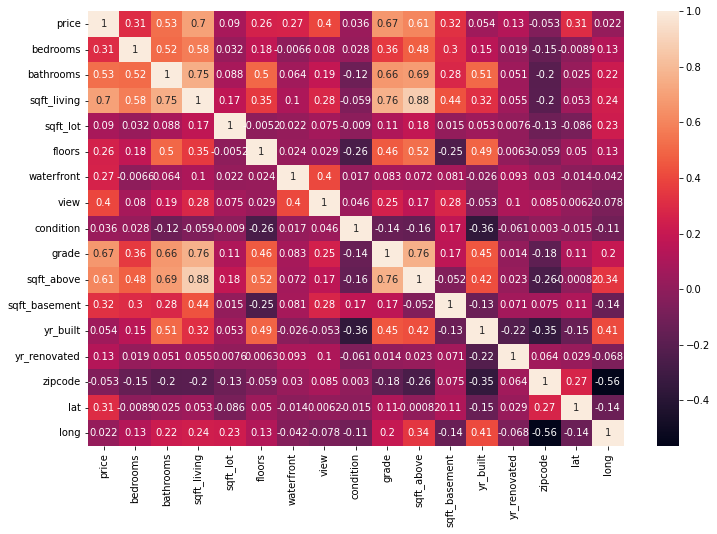

In [215]:
ax = sns.heatmap(num_attributes.corr(method='pearson'), annot=True)
ax.figure.set_size_inches(12, 8)

* Usando a correlação das variáveis para futuramente aprofundar ainda mais as minhas variáveis

### 1.7.2 Atributos Categóricos

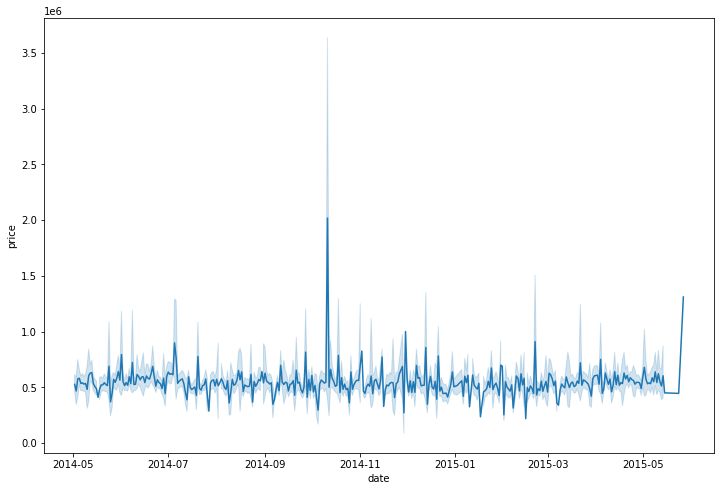

In [216]:
ax = sns.lineplot(x = 'date', y = 'price',data = df1)
ax.figure.set_size_inches(12, 8)

* Podemos perceber que a data da venda não influencia no preço, não temos nenhuma relação da data da venda com o valor, porém acredito que a sazonalidade possa ter uma influencia maior

# 2.0 FEATURING ENGEENIRING

In [217]:
df2 = df1.copy()

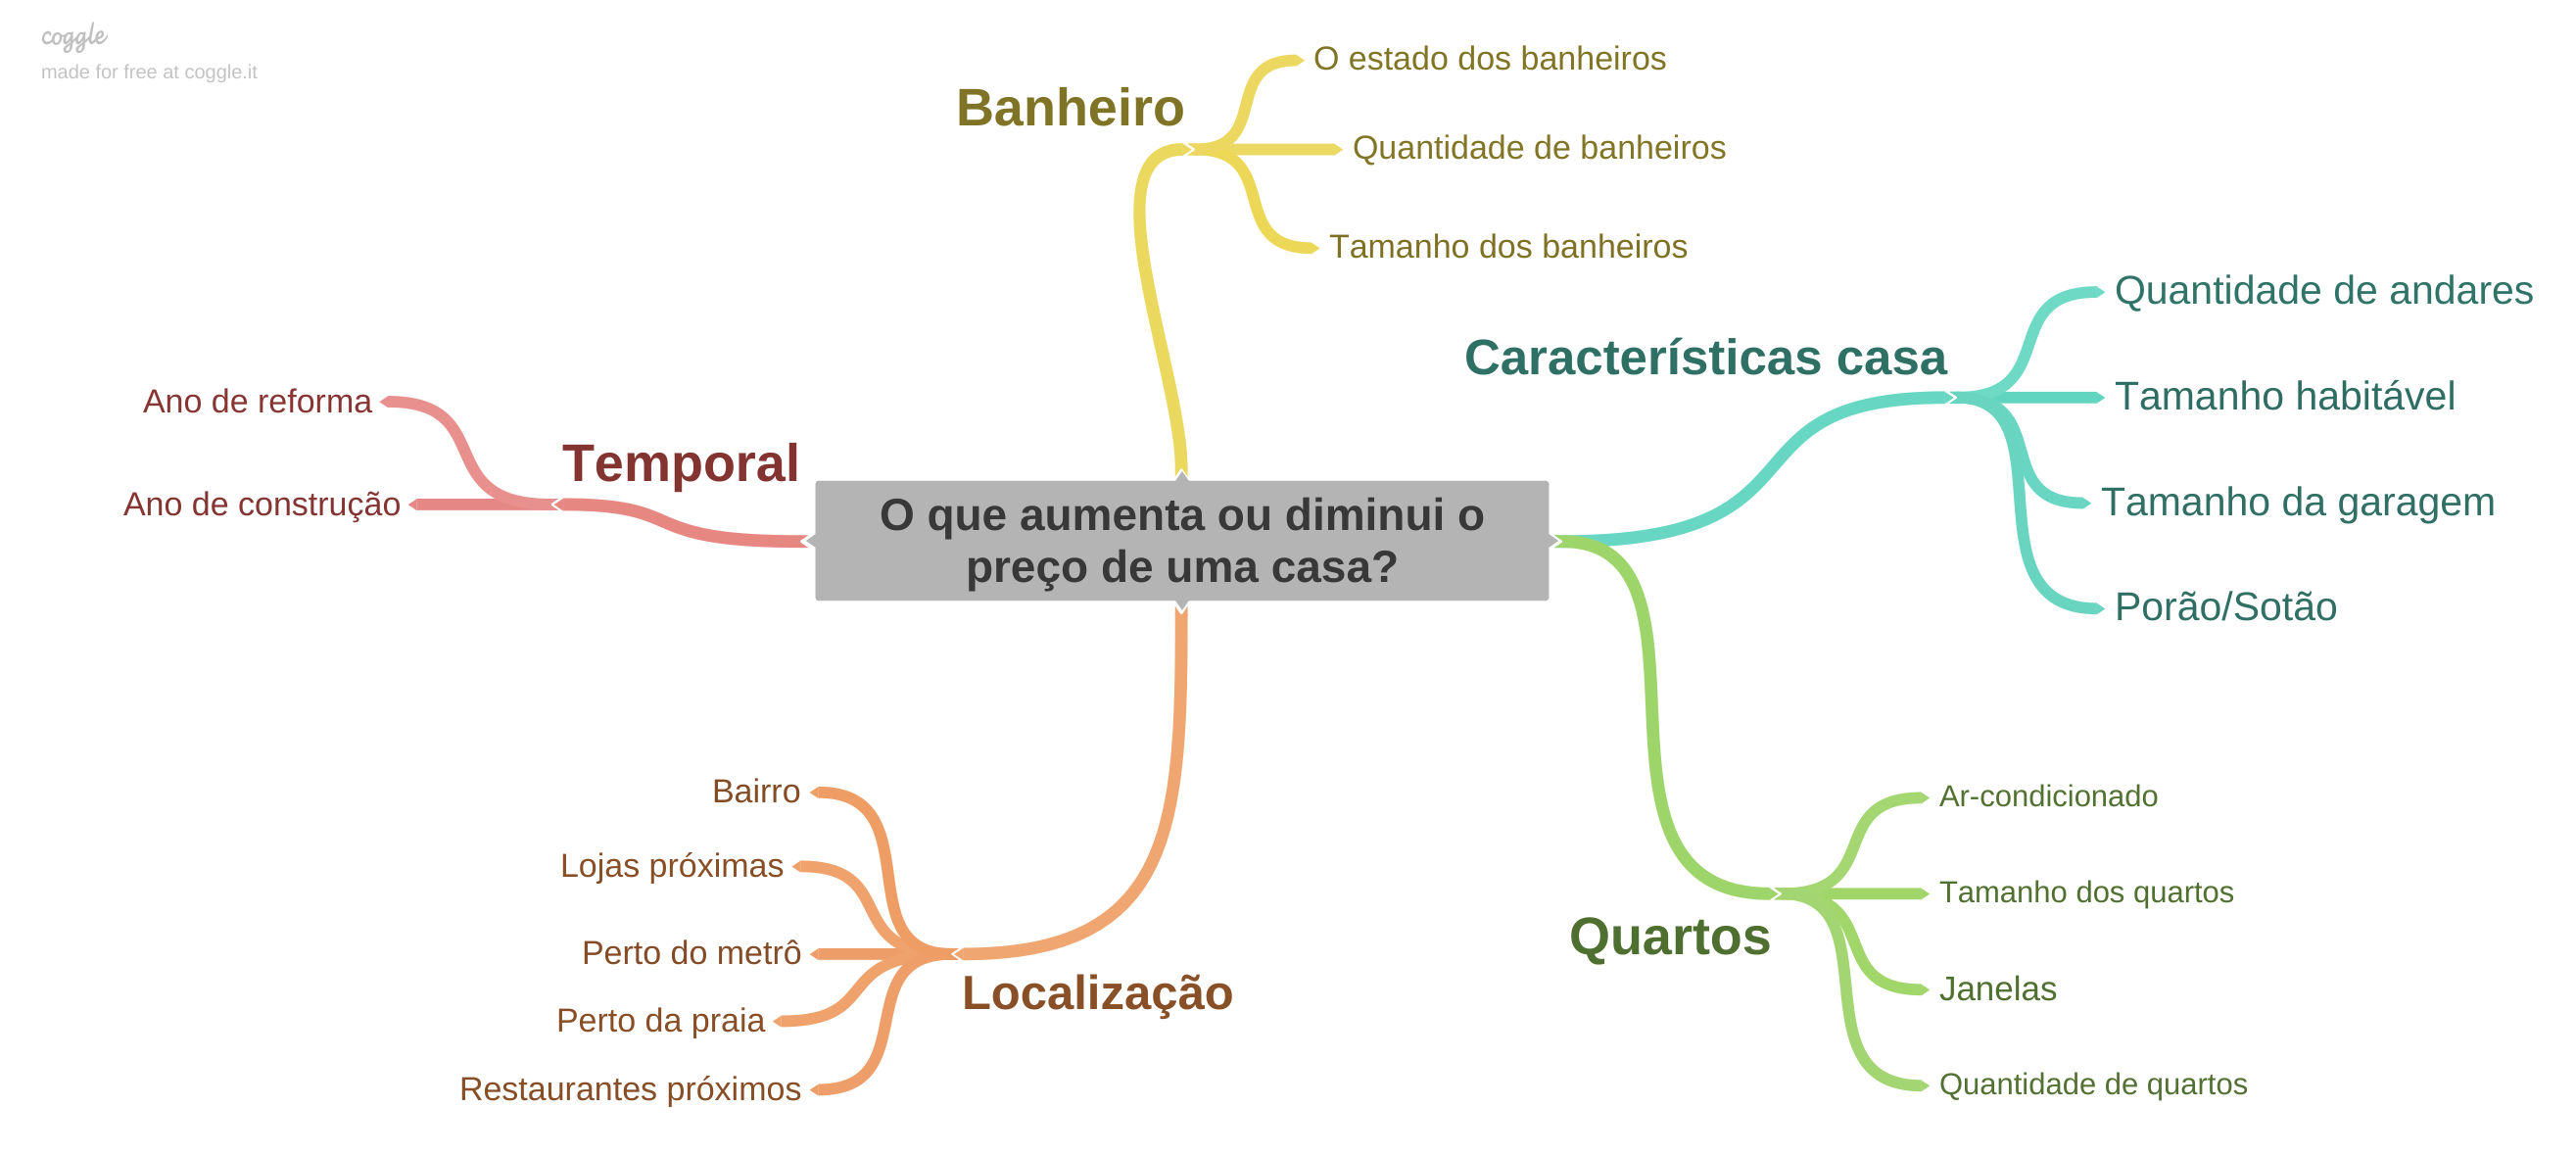

In [218]:
Image('images/O_que_aumenta_ou_diminui_o_preo_de_uma_casa.png')

## 2.1 Criação de hipóteses

### 2.1.1 Hipótese Localização

**1.** Quanto mais lojas próximas, mais cara é a casa - **Versão Futura**

**2.** Casas que estão perto da praia ou tem vista para o mar, são pelo menos 15% mais caras

**3.** Casas que tem restaurantes próximos são mais caras **Versão Futura**

**4.** Casas em bairros nobres, são pelo menos 20% mais caras

**5.** Casas que tem uma vista mais bonita são pelo menos 12% mais caras

### 2.1.2 Hipótese das Características da casa

**1.** Casas com mais andares são mais caras

**2.** Casas com um tamanho habitável maior, são mais caras

**3.** Casas com Garagem são mais caras

**4.** Casas que tem porão/sotão são mais caras 

**5.** Casas que muitos banheiros são mais caras

**6.** Casas que muitos quartos são mais caras

**7.** Casas que tem um design de construção melhor são pelo menos, 10% mais caras

### 2.1.3 Hipótese Temporal

**1.** Casas que foram reformadas são mais caras

**2.** Casas mais antigas são mais baratas

**3.** A sazonalidade interfere no preço das casas

## 2.2 Lista de hipóteses

Casas que estão perto da praia ou tem vista para o mar, são mais caras

Casas em bairros nobres, são  mais caras (Vou usar o zip code para dividir as regiões)

Casas que tem uma vista mais bonita, são mais caras

 Casas com mais andares são  mais caras

Casas que tem um design de construção melhor são  mais caras

Casas que foram reformadas são mais caras

Casas mais antigas são mais baratas

A sazonalidade interfere no preço das casas

## 2.3 Feature Engineering

In [219]:
# Condição do imóvel 1 - Péssimo, 2 - Ruim, 3 - Normal, 4 - Bom, 5 - Excelente
df2['house_condition'] = 'standart'

df2.loc[df2['condition'] == 1, 'house_condition'] = 'Pessimo'
df2.loc[df2['condition'] == 2, 'house_condition'] = 'Ruim'
df2.loc[df2['condition'] == 3, 'house_condition'] = 'Normal'
df2.loc[df2['condition'] == 4, 'house_condition'] = 'Bom'
df2.loc[df2['condition'] == 5, 'house_condition'] = 'Excelente'


# Classificando os imóveis de acordo com a quantidade de quartos
df2['house_type'] = ''

df2.loc[df2['bedrooms'] <= 1, 'house_type'] = 'Galpao'
df2.loc[df2['bedrooms'] == 2, 'house_type'] = 'Apartamento'
df2.loc[df2['bedrooms'] >= 3, 'house_type'] = 'Casa'

# Classificando os imóveis de acordo com a qualidade do design
df2['design_quality'] = ''

df2.loc[df2['grade'] <= 3, 'design_quality'] = 'Muito ruim'
df2.loc[df2['grade'] >= 4, 'design_quality'] = 'Ruim'
df2.loc[df2['grade'] >= 7, 'design_quality'] = 'Medio'
df2.loc[df2['grade'] >= 10, 'design_quality'] = 'Bom'
df2.loc[df2['grade'] >= 12, 'design_quality'] = 'Muito bom'

# Vou estar criando uma feature derivada dos zipcodes, onde vou chamar de regiões. Ela vão me ajuda a entender quais regiões
# são mais cara e as mais baratas

zipcode = df2['zipcode'].unique() # Criando uma array com os zipcodes da região
list_region = [] # Criando uma lista para armazenar os nomes das regiões
engine = SearchEngine() # método da biblioteca uszipcode para realizar a pesquisa

# For ultilizado para realizar a pesquisa do zipcode
for i in zipcode:
    aux = engine.by_zipcode(i)
    list_region.append(aux.major_city)
    
zip_dict = dict(zip(zipcode, list_region)) # Criando um dicionário entre as minhas duas listas
df2['region_name'] = df2['zipcode'].map(zip_dict) #mapeando o zipcode com o nome da região


#Vou criar as estações do ano, visto que acredito que de alguma forma elas podem influenciar as compras e vendas dos imóveis

#extraindo o mês da data
df2['month'] = df2['date'].dt.month

#depois criar um dicionário com as datas e a estação do ano
season_of_year = {1:'winter' , 2:'winter' , 3:'winter' , 4: 'spring', 5: 'spring', 6: 'spring', 
                  7:'summer', 8:'summer', 9:'summer' , 10:'autumn', 11:'autumn', 12:'autumn' , }

#depois usar a função map parar preencher minha feature
df2['season'] = df2['month'].map(season_of_year)

* Essas variaveis foram criadas para melhorar a análise exploratória de dados, elas não se encaixariam muito bem em um modelo pois seria necessário fazer o encoding das mesmas, logo estou fazer o processo reverso para ter uma visualização mais clara